In [1]:
import torch
import pickle
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#### Explore attenion maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


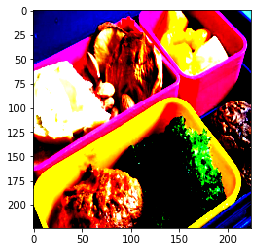

In [2]:
train_img = torch.load("cached_data/train_img")

print(train_img[0].size())
plt.imshow(np.fliplr((train_img[0].permute(1, 2, 0))))
plt.show()

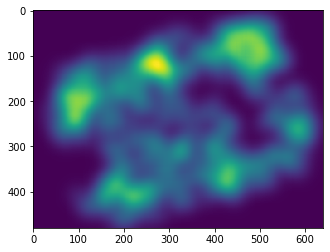

torch.Size([1, 224, 224])


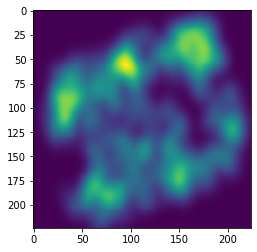

In [3]:
image_map  = 'dataset/maps/train/COCO_train2014_000000000009.png'

img = Image.open(image_map)
plt.imshow(img)
plt.show()
normalize = transforms.Normalize(mean=[0.485],
                                 std=[0.229])
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            normalize
        ])

mask = transform(img)
print(mask.size())

plt.imshow(mask[0])


torch.Size([3, 224, 224])


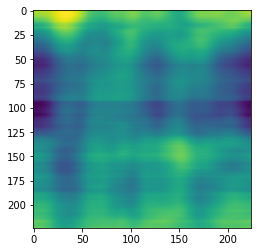

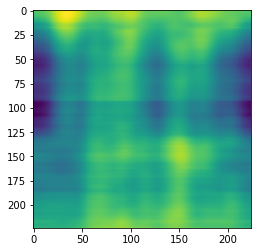

In [4]:
result1 = torch.matmul(train_img[0],mask[0])
result2 = torch.matmul(1 + train_img[0],mask[0])

print(result1.size())
## output for specific channel
plt.imshow(result1.permute(1, 2, 0)[:,:,0]) 
plt.show()
plt.imshow(result2.permute(1, 2, 0)[:,:,0])

#### Extract feature maps

In [10]:
import vision_network
device = "cuda:0"
vision_net = vision_network.VisionNet(device)

timeline = "20191219-111227"
vision_net.model.load_state_dict(torch.load("models/enc1-%s" % timeline))
# model = torch.load("models/enc1-%s" % timeline)

<All keys matched successfully>

In [13]:
# print (vision_net.model)
model = vision_net.model
layer = model._modules.get('maxpool')
print(layer)

MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
